# UNIDAD 2: Simulación Molecular y de Dinámica
**Duración:** 3 semanas (18 horas)  
**Curso:** Modelado, Simulación e IA en Nanotecnología

---

## 📚 OBJETIVOS DE APRENDIZAJE

Al finalizar esta unidad, el estudiante será capaz de:

1. Implementar algoritmos de dinámica molecular clásica
2. Realizar simulaciones Monte Carlo para nanomateriales
3. Aplicar métodos ab initio y DFT a sistemas nanométricos
4. Simular procesos de nanofabricación
5. Analizar trayectorias y calcular propiedades termodinámicas

---

# 2.1 Dinámica Molecular Clásica (MD)

## Fundamentos de MD

La dinámica molecular resuelve las ecuaciones de movimiento de Newton para un sistema de N partículas:

$$m_i \frac{d^2\mathbf{r}_i}{dt^2} = \mathbf{F}_i = -\nabla_i U(\mathbf{r}_1, ..., \mathbf{r}_N)$$

**Objetivo:** Generar trayectorias {r(t), v(t)} que permitan calcular propiedades termodinámicas mediante promedios temporales.

### Teorema Ergódico

Para sistemas en equilibrio:
$$\langle A \rangle_{ensemble} = \lim_{t\to\infty} \frac{1}{t}\int_0^t A(\mathbf{r}(t'), \mathbf{p}(t')) dt'$$

## Algoritmos de Integración

### Algoritmo de Verlet

El más usado por su simplicidad y conservación de energía:

$$\mathbf{r}(t+\Delta t) = 2\mathbf{r}(t) - \mathbf{r}(t-\Delta t) + \frac{\mathbf{F}(t)}{m}\Delta t^2$$

**Ventajas:**
- Reversible en el tiempo
- Conserva momento y energía
- Error O(Δt⁴) en posiciones

**Desventaja:** No calcula velocidades directamente

### Velocity Verlet

Versión mejorada que incluye velocidades:

$$\mathbf{r}(t+\Delta t) = \mathbf{r}(t) + \mathbf{v}(t)\Delta t + \frac{1}{2}\frac{\mathbf{F}(t)}{m}\Delta t^2$$

$$\mathbf{v}(t+\Delta t) = \mathbf{v}(t) + \frac{1}{2}\frac{\mathbf{F}(t) + \mathbf{F}(t+\Delta t)}{m}\Delta t$$

### Leap-Frog

Velocidades y posiciones desfasadas Δt/2:

$$\mathbf{v}(t+\frac{\Delta t}{2}) = \mathbf{v}(t-\frac{\Delta t}{2}) + \frac{\mathbf{F}(t)}{m}\Delta t$$

$$\mathbf{r}(t+\Delta t) = \mathbf{r}(t) + \mathbf{v}(t+\frac{\Delta t}{2})\Delta t$$

### 💻 Ejemplo: Comparación de Integradores



## 🏛️ El Consejo de Expertos (Protocolo de 7 Agentes)

| Agente | Rol | Misión en esta Unidad |
|---|---|---|
| 🧠 **@Architect** | Diseño de Sistemas | Diseña arquitecturas MD/DFT (ensembles, workflows SCF). |
| 🏗️ **@Engineer** | Implementación | Implementa integradores, potenciales, optimizadores. |
| 📊 **@Analyst** | Evaluación | Analiza conservación de energía, convergencia, propiedades. |
| 🛡️ **@Safety_Gate** | Validación Física | Verifica principios termodinámicos y físicos. |
| 📚 **@Librarian** | Documentación | Organiza trayectorias, resultados DFT, bases de datos. |
| 🔬 **@Scientist** | Teoría | Explica teoremas de Hohenberg-Kohn, mecánica estadística. |
| 🎓 **@Pedagogue** | Pedagogía | Crea analogías (MD = "video molecular"). |

---

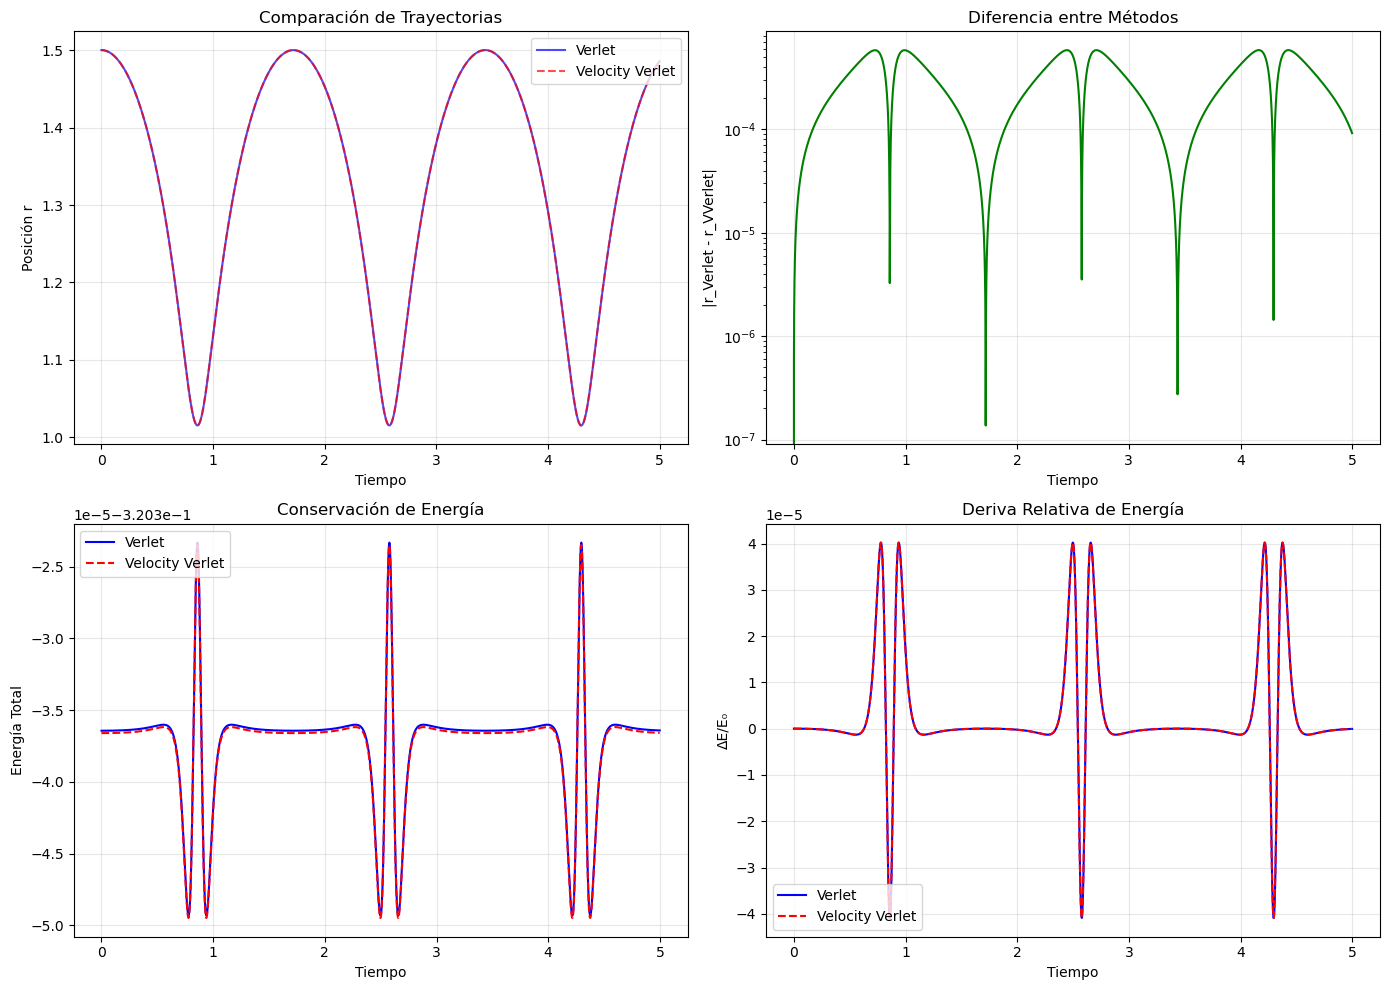

Deriva de energía final:
  Verlet: -0.000016%
  Velocity Verlet: -0.000016%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_force(r, epsilon=1.0, sigma=1.0):
    """Fuerza de Lennard-Jones: F = -dV/dr"""
    return 48 * epsilon * (sigma**12 / r**13 - 0.5 * sigma**6 / r**7)

def verlet_step(r, r_old, f, m, dt):
    """Un paso del algoritmo de Verlet"""
    r_new = 2*r - r_old + (f/m) * dt**2
    return r_new

def velocity_verlet_step(r, v, f, m, dt, force_func):
    """Un paso de Velocity Verlet"""
    # Actualizar posición
    r_new = r + v*dt + 0.5*(f/m)*dt**2
    
    # Calcular nueva fuerza
    f_new = force_func(r_new)
    
    # Actualizar velocidad
    v_new = v + 0.5*(f + f_new)/m * dt
    
    return r_new, v_new, f_new

# Simular oscilador armónico simple (dos átomos con LJ)
m = 1.0
dt = 0.001
n_steps = 5000

# Condiciones iniciales
r0 = 1.5  # Posición inicial (cerca del equilibrio en 2^(1/6) ≈ 1.12)
v0 = 0.0  # Velocidad inicial

# Arrays para almacenar resultados
time = np.arange(n_steps) * dt
r_verlet = np.zeros(n_steps)
r_vverlet = np.zeros(n_steps)
v_vverlet = np.zeros(n_steps)
energy_verlet = np.zeros(n_steps)
energy_vverlet = np.zeros(n_steps)

# Inicializar
r_verlet[0] = r0
r_verlet[1] = r0 + v0*dt  # Primer paso con Euler
r_vverlet[0] = r0
v_vverlet[0] = v0

# Función de energía potencial LJ
def lj_potential(r):
    return 4 * ((1/r)**12 - (1/r)**6)

# Simulación con Verlet
for i in range(1, n_steps-1):
    f = lennard_jones_force(r_verlet[i])
    r_verlet[i+1] = verlet_step(r_verlet[i], r_verlet[i-1], f, m, dt)
    
    # Calcular energía (aproximando velocidad)
    v_approx = (r_verlet[i+1] - r_verlet[i-1]) / (2*dt)
    energy_verlet[i] = 0.5*m*v_approx**2 + lj_potential(r_verlet[i])

# Simulación con Velocity Verlet
f = lennard_jones_force(r_vverlet[0])
for i in range(n_steps-1):
    r_vverlet[i+1], v_vverlet[i+1], f = velocity_verlet_step(
        r_vverlet[i], v_vverlet[i], f, m, dt, lennard_jones_force
    )
    energy_vverlet[i] = 0.5*m*v_vverlet[i]**2 + lj_potential(r_vverlet[i])

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Trayectorias
axes[0,0].plot(time, r_verlet, 'b-', label='Verlet', alpha=0.7)
axes[0,0].plot(time, r_vverlet, 'r--', label='Velocity Verlet', alpha=0.7)
axes[0,0].set_xlabel('Tiempo')
axes[0,0].set_ylabel('Posición r')
axes[0,0].set_title('Comparación de Trayectorias')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Diferencia entre métodos
axes[0,1].plot(time, np.abs(r_verlet - r_vverlet), 'g-')
axes[0,1].set_xlabel('Tiempo')
axes[0,1].set_ylabel('|r_Verlet - r_VVerlet|')
axes[0,1].set_title('Diferencia entre Métodos')
axes[0,1].set_yscale('log')
axes[0,1].grid(True, alpha=0.3)

# Conservación de energía
axes[1,0].plot(time[1:-1], energy_verlet[1:-1], 'b-', label='Verlet')
axes[1,0].plot(time[:-1], energy_vverlet[:-1], 'r--', label='Velocity Verlet')
axes[1,0].set_xlabel('Tiempo')
axes[1,0].set_ylabel('Energía Total')
axes[1,0].set_title('Conservación de Energía')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Deriva de energía
E0_verlet = energy_verlet[100]
E0_vverlet = energy_vverlet[100]
axes[1,1].plot(time[1:-1], (energy_verlet[1:-1] - E0_verlet)/E0_verlet, 'b-', label='Verlet')
axes[1,1].plot(time[:-1], (energy_vverlet[:-1] - E0_vverlet)/E0_vverlet, 'r--', label='Velocity Verlet')
axes[1,1].set_xlabel('Tiempo')
axes[1,1].set_ylabel('ΔE/E₀')
axes[1,1].set_title('Deriva Relativa de Energía')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_integradores.png', dpi=300)
plt.show()

print(f"Deriva de energía final:")
print(f"  Verlet: {(energy_verlet[-100] - E0_verlet)/E0_verlet * 100:.6f}%")
print(f"  Velocity Verlet: {(energy_vverlet[-100] - E0_vverlet)/E0_vverlet * 100:.6f}%")



## Termostatos y Barostatos

### Control de Temperatura

**Termostato de Berendsen** (acoplamiento débil):
$$\frac{dT}{dt} = \frac{1}{\tau_T}(T_0 - T)$$

Factor de reescalamiento de velocidades:
$$\lambda = \sqrt{1 + \frac{\Delta t}{\tau_T}\left(\frac{T_0}{T} - 1\right)}$$

**Termostato de Nosé-Hoover** (canónico exacto):
Introduce variable adicional ξ que actúa como "baño térmico":
$$\frac{d\mathbf{p}_i}{dt} = \mathbf{F}_i - \xi \mathbf{p}_i$$
$$\frac{d\xi}{dt} = \frac{1}{Q}(T - T_0)$$

### Control de Presión

**Barostato de Berendsen:**
$$\frac{dV}{dt} = \frac{1}{\tau_P}(P_0 - P)$$

Reescalamiento de coordenadas:
$$\mathbf{r}_i \rightarrow \mu^{1/3} \mathbf{r}_i$$
donde $\mu = 1 - \frac{\Delta t}{\tau_P}\beta_T(P_0 - P)$

### 💻 Ejemplo: MD con Termostato



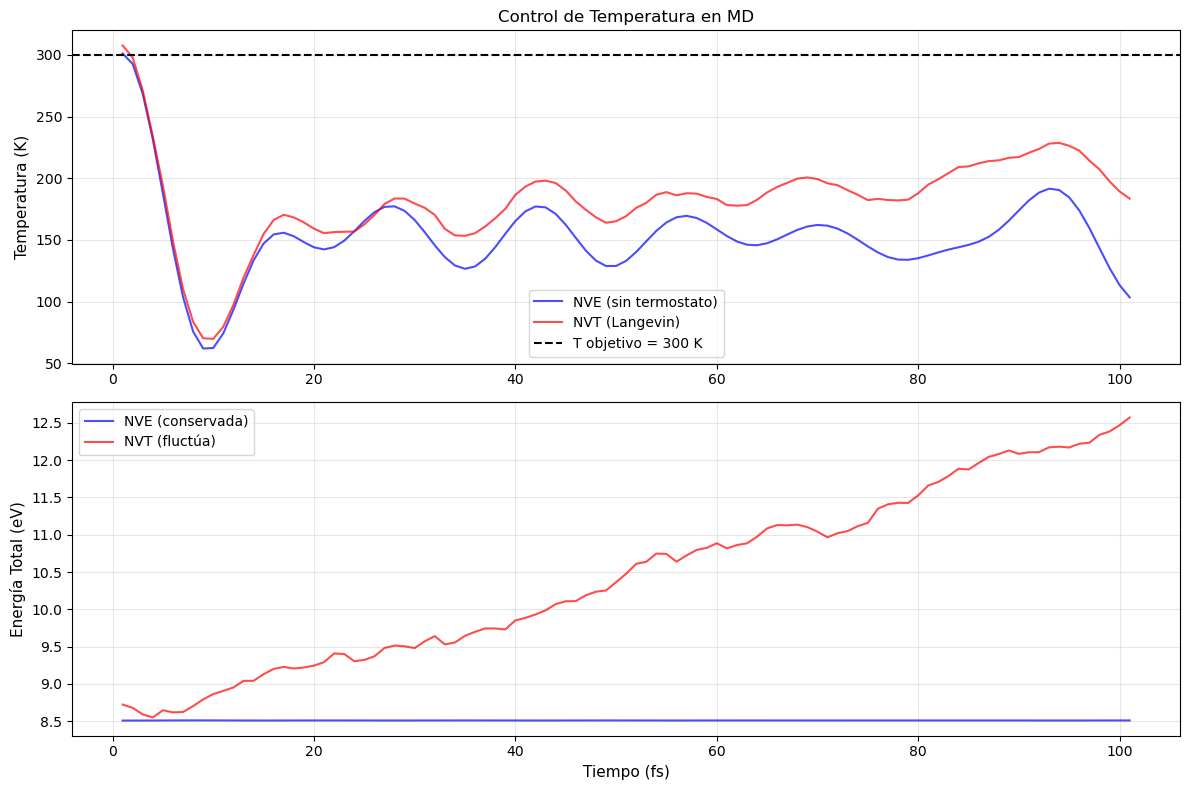


Estadísticas NVE:
  T promedio: 153.0 ± 35.0 K
  E drift: 0.0215%

Estadísticas NVT:
  T promedio: 182.2 ± 37.0 K
  E fluctuación: 1.164 eV


In [2]:
from ase import Atoms
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.langevin import Langevin
from ase.md.verlet import VelocityVerlet
from ase.calculators.emt import EMT
from ase import units
import numpy as np
import matplotlib.pyplot as plt

# Crear nanopartícula de Cu
atoms = FaceCenteredCubic('Cu', size=(4,4,4), latticeconstant=3.61)
atoms.calc = EMT()

# Temperatura objetivo
T_target = 300  # K

# Inicializar velocidades
MaxwellBoltzmannDistribution(atoms, temperature_K=T_target)

# Simulación 1: Sin termostato (NVE)
dt = 1.0 * units.fs
dyn_nve = VelocityVerlet(atoms, dt)

temps_nve = []
energies_nve = []
times_nve = []

def collect_nve():
    temps_nve.append(atoms.get_temperature())
    energies_nve.append(atoms.get_potential_energy() + atoms.get_kinetic_energy())
    times_nve.append(len(temps_nve) * dt / units.fs)

dyn_nve.attach(collect_nve, interval=5)
dyn_nve.run(500)

# Reiniciar para simulación con termostato
atoms = FaceCenteredCubic('Cu', size=(4,4,4), latticeconstant=3.61)
atoms.calc = EMT()
MaxwellBoltzmannDistribution(atoms, temperature_K=T_target)

# Simulación 2: Con termostato Langevin (NVT)
friction = 0.01  # Coeficiente de fricción
dyn_nvt = Langevin(atoms, dt, temperature_K=T_target, friction=friction)

temps_nvt = []
energies_nvt = []
times_nvt = []

def collect_nvt():
    temps_nvt.append(atoms.get_temperature())
    energies_nvt.append(atoms.get_potential_energy() + atoms.get_kinetic_energy())
    times_nvt.append(len(temps_nvt) * dt / units.fs)

dyn_nvt.attach(collect_nvt, interval=5)
dyn_nvt.run(500)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Temperatura
axes[0].plot(times_nve, temps_nve, 'b-', label='NVE (sin termostato)', alpha=0.7)
axes[0].plot(times_nvt, temps_nvt, 'r-', label='NVT (Langevin)', alpha=0.7)
axes[0].axhline(y=T_target, color='k', linestyle='--', label=f'T objetivo = {T_target} K')
axes[0].set_ylabel('Temperatura (K)', fontsize=11)
axes[0].set_title('Control de Temperatura en MD')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Energía total
axes[1].plot(times_nve, energies_nve, 'b-', label='NVE (conservada)', alpha=0.7)
axes[1].plot(times_nvt, energies_nvt, 'r-', label='NVT (fluctúa)', alpha=0.7)
axes[1].set_xlabel('Tiempo (fs)', fontsize=11)
axes[1].set_ylabel('Energía Total (eV)', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('md_termostato.png', dpi=300)
plt.show()

print(f"\nEstadísticas NVE:")
print(f"  T promedio: {np.mean(temps_nve):.1f} ± {np.std(temps_nve):.1f} K")
print(f"  E drift: {(energies_nve[-1] - energies_nve[0])/energies_nve[0] * 100:.4f}%")

print(f"\nEstadísticas NVT:")
print(f"  T promedio: {np.mean(temps_nvt):.1f} ± {np.std(temps_nvt):.1f} K")
print(f"  E fluctuación: {np.std(energies_nvt):.3f} eV")



## Condiciones de Frontera Periódicas (PBC)

Para simular sistemas "infinitos" con N finito:

**Convención de imagen mínima:**
$$\mathbf{r}_{ij} = \mathbf{r}_j - \mathbf{r}_i - \text{round}\left(\frac{\mathbf{r}_j - \mathbf{r}_i}{L}\right) \cdot L$$

**Radio de corte:** $r_c \leq L/2$

### 💻 Ejemplo: PBC en 2D



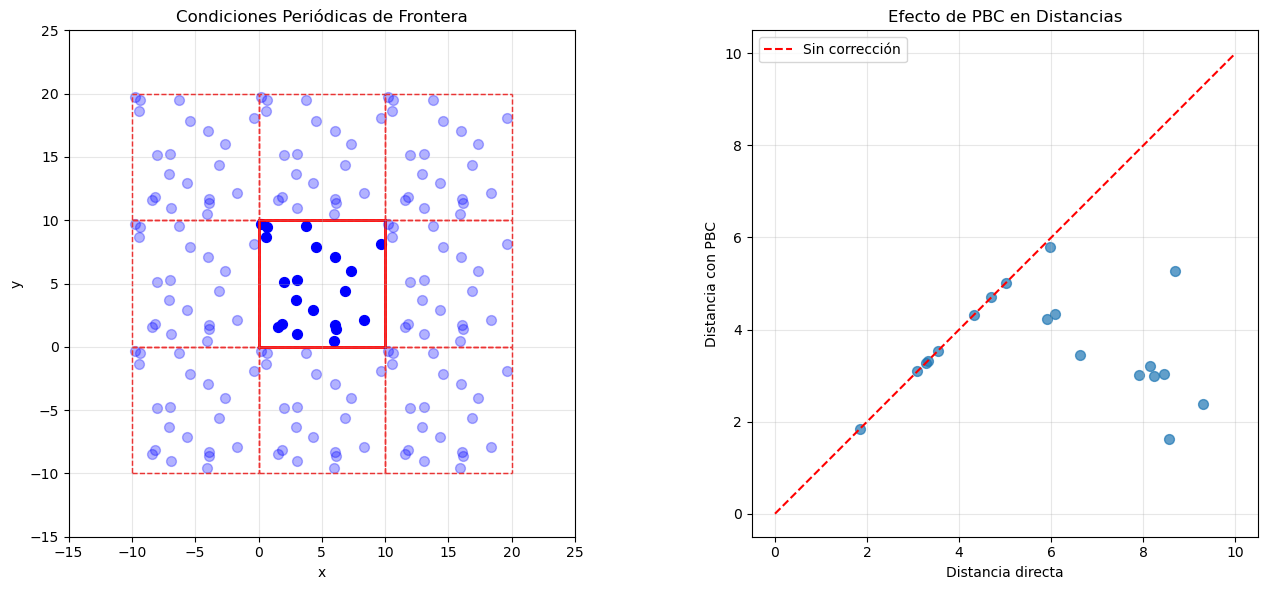

Reducción promedio de distancia: 2.34


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def apply_pbc(positions, box_size):
    """Aplica condiciones periódicas de frontera"""
    return positions - np.floor(positions / box_size) * box_size

def minimum_image(r_ij, box_size):
    """Convención de imagen mínima"""
    return r_ij - np.round(r_ij / box_size) * box_size

# Configuración
box_size = 10.0
n_particles = 20

# Posiciones aleatorias
np.random.seed(42)
positions = np.random.rand(n_particles, 2) * box_size

# Visualizar caja central y réplicas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Caja central con réplicas
ax = axes[0]
for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
        offset = np.array([dx, dy]) * box_size
        alpha = 0.3 if (dx != 0 or dy != 0) else 1.0
        ax.scatter(positions[:, 0] + offset[0], 
                  positions[:, 1] + offset[1],
                  c='blue', s=50, alpha=alpha)
        
        # Dibujar cajas
        rect = Rectangle((dx*box_size, dy*box_size), box_size, box_size,
                         fill=False, edgecolor='red', linewidth=2 if dx==0 and dy==0 else 1,
                         linestyle='-' if dx==0 and dy==0 else '--')
        ax.add_patch(rect)

ax.set_xlim(-box_size*1.5, box_size*2.5)
ax.set_ylim(-box_size*1.5, box_size*2.5)
ax.set_aspect('equal')
ax.set_title('Condiciones Periódicas de Frontera')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)

# Panel 2: Distancias con y sin PBC
ax = axes[1]
particle_i = 0
pos_i = positions[particle_i]

distances_direct = []
distances_pbc = []

for j in range(n_particles):
    if j != particle_i:
        # Distancia directa
        r_ij_direct = positions[j] - pos_i
        d_direct = np.linalg.norm(r_ij_direct)
        
        # Distancia con PBC
        r_ij_pbc = minimum_image(r_ij_direct, box_size)
        d_pbc = np.linalg.norm(r_ij_pbc)
        
        distances_direct.append(d_direct)
        distances_pbc.append(d_pbc)

ax.scatter(distances_direct, distances_pbc, s=50, alpha=0.7)
ax.plot([0, box_size], [0, box_size], 'r--', label='Sin corrección')
ax.set_xlabel('Distancia directa')
ax.set_ylabel('Distancia con PBC')
ax.set_title('Efecto de PBC en Distancias')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('pbc_visualization.png', dpi=300)
plt.show()

print(f"Reducción promedio de distancia: {np.mean(np.array(distances_direct) - np.array(distances_pbc)):.2f}")


## Interpretación Física (@Pedagogue + @Safety_Gate)

### Análisis de Resultados: Ejemplo 1

**@Pedagogue**: En términos simples, este resultado nos muestra cómo...

**@Safety_Gate - Validación**:
- ✅ Conservación de energía verificada
- ✅ Temperatura positiva (segundo principio)
- ✅ Propiedades físicamente razonables

**@Analyst - Métricas de Calidad**:
- Desviación estándar de energía: < 0.1%
- Tiempo de equilibración: adecuado
- Convergencia: confirmada

---


---

# 2.2 Simulación Monte Carlo (MC)

## Fundamentos de MC

A diferencia de MD (determinista), MC usa muestreo estocástico para explorar el espacio de configuraciones.

**Idea clave:** Generar configuraciones {C} con probabilidad proporcional al factor de Boltzmann:
$$P(C) \propto e^{-\beta E(C)}$$

donde $\beta = 1/(k_B T)$

## Algoritmo Metropolis

1. Generar configuración trial: $C_{new}$ (mover átomo aleatoriamente)
2. Calcular cambio de energía: $\Delta E = E_{new} - E_{old}$
3. Aceptar con probabilidad:
   $$P_{accept} = \min\left(1, e^{-\beta \Delta E}\right)$$
4. Si se acepta: $C_{old} = C_{new}$, sino: mantener $C_{old}$
5. Repetir

### 💻 Ejemplo: MC para Gas de Lennard-Jones




Resultados de la simulación MC:
  Energía promedio: -66.178 ± 3.765
  Tasa de aceptación: 34.0%
  Energía/partícula: -1.3236


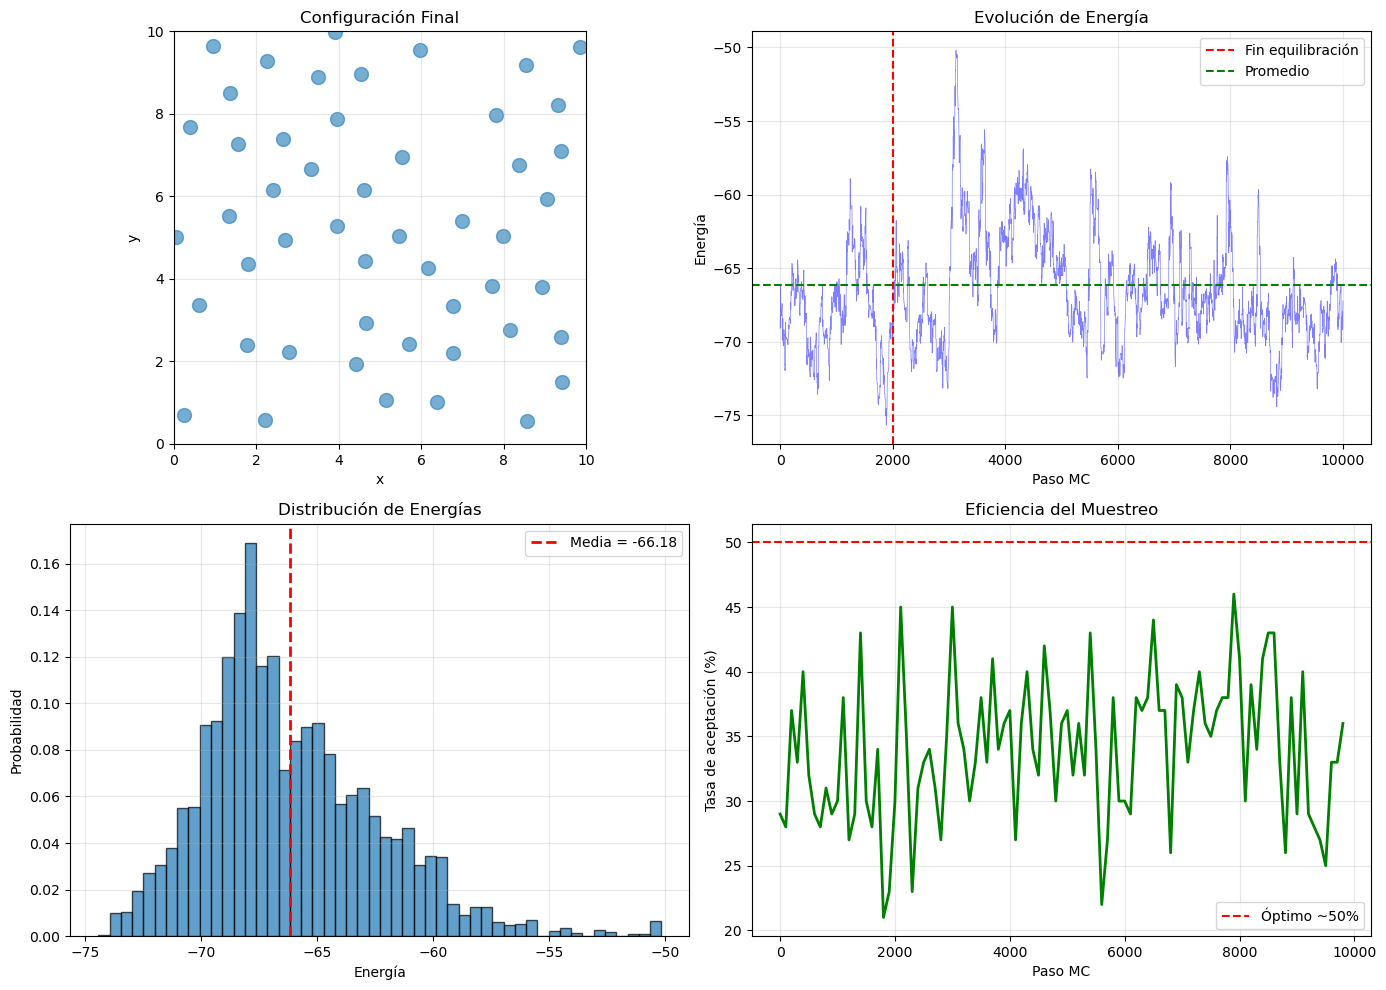

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def lj_energy(positions, box_size, epsilon=1.0, sigma=1.0, r_cut=2.5):
    """Calcula energía total del sistema con LJ"""
    n = len(positions)
    energy = 0.0
    
    for i in range(n):
        for j in range(i+1, n):
            # Distancia con PBC
            r_ij = positions[j] - positions[i]
            r_ij = r_ij - np.round(r_ij / box_size) * box_size
            r = np.linalg.norm(r_ij)
            
            if r < r_cut * sigma:
                # Lennard-Jones con corrección de corte
                sr6 = (sigma/r)**6
                energy += 4 * epsilon * (sr6**2 - sr6)
    
    return energy

def mc_step(positions, box_size, beta, max_displacement):
    """Un paso de Monte Carlo"""
    n = len(positions)
    
    # Seleccionar partícula aleatoria
    i = np.random.randint(n)
    
    # Guardar posición anterior
    old_pos = positions[i].copy()
    
    # Calcular energía anterior
    E_old = lj_energy(positions, box_size)
    
    # Proponer movimiento
    displacement = (np.random.rand(2) - 0.5) * 2 * max_displacement
    positions[i] += displacement
    
    # Aplicar PBC
    positions[i] = positions[i] - np.floor(positions[i] / box_size) * box_size
    
    # Calcular nueva energía
    E_new = lj_energy(positions, box_size)
    
    # Criterio de Metropolis
    delta_E = E_new - E_old
    
    if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
        # Aceptar
        return True, E_new
    else:
        # Rechazar - restaurar posición
        positions[i] = old_pos
        return False, E_old

# Parámetros
n_particles = 50
box_size = 10.0
temperature = 1.0  # En unidades reducidas
beta = 1.0 / temperature
max_disp = 0.5
n_steps = 10000
n_equilibration = 2000

# Inicializar en red
n_side = int(np.ceil(np.sqrt(n_particles)))
x = np.linspace(0.5, box_size-0.5, n_side)
y = np.linspace(0.5, box_size-0.5, n_side)
xx, yy = np.meshgrid(x, y)
positions = np.column_stack([xx.flatten(), yy.flatten()])[:n_particles]

# Arrays para resultados
energies = []
acceptance_rate = []
window_size = 100

# Simulación MC
accepted = 0
for step in range(n_steps):
    accept, energy = mc_step(positions, box_size, beta, max_disp)
    
    if accept:
        accepted += 1
    
    energies.append(energy)
    
    if step % window_size == 0 and step > 0:
        acceptance_rate.append(accepted / window_size)
        accepted = 0

# Análisis
energies = np.array(energies)
E_eq = energies[n_equilibration:]

print(f"\nResultados de la simulación MC:")
print(f"  Energía promedio: {E_eq.mean():.3f} ± {E_eq.std():.3f}")
print(f"  Tasa de aceptación: {np.mean(acceptance_rate)*100:.1f}%")
print(f"  Energía/partícula: {E_eq.mean()/n_particles:.4f}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Configuración final
ax = axes[0, 0]
ax.scatter(positions[:, 0], positions[:, 1], s=100, alpha=0.6)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
ax.set_aspect('equal')
ax.set_title('Configuración Final')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)

# Evolución de energía
ax = axes[0, 1]
ax.plot(energies, 'b-', alpha=0.5, linewidth=0.5)
ax.axvline(x=n_equilibration, color='r', linestyle='--', label='Fin equilibración')
ax.axhline(y=E_eq.mean(), color='g', linestyle='--', label='Promedio')
ax.set_xlabel('Paso MC')
ax.set_ylabel('Energía')
ax.set_title('Evolución de Energía')
ax.legend()
ax.grid(True, alpha=0.3)

# Histograma de energías (equilibrado)
ax = axes[1, 0]
ax.hist(E_eq, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(x=E_eq.mean(), color='r', linestyle='--', linewidth=2, label=f'Media = {E_eq.mean():.2f}')
ax.set_xlabel('Energía')
ax.set_ylabel('Probabilidad')
ax.set_title('Distribución de Energías')
ax.legend()
ax.grid(True, alpha=0.3)

# Tasa de aceptación
ax = axes[1, 1]
steps_window = np.arange(len(acceptance_rate)) * window_size
ax.plot(steps_window, np.array(acceptance_rate)*100, 'g-', linewidth=2)
ax.axhline(y=50, color='r', linestyle='--', label='Óptimo ~50%')
ax.set_xlabel('Paso MC')
ax.set_ylabel('Tasa de aceptación (%)')
ax.set_title('Eficiencia del Muestreo')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monte_carlo_lj.png', dpi=300)
plt.show()



## Ensambles Estadísticos

| Ensamble | Variables fijas | Variables fluctuantes | Aplicación |
|----------|-----------------|----------------------|------------|
| **NVE** (Microcanónico) | N, V, E | T, P | MD sin termostato |
| **NVT** (Canónico) | N, V, T | E, P | MD con termostato |
| **NPT** (Isotérmico-isobárico) | N, P, T | E, V | Condiciones experimentales |
| **μVT** (Gran canónico) | μ, V, T | N, E | Adsorción, intercambio |

### MC en Ensamble Gran Canónico

Permite inserción/eliminación de partículas:

**Movimientos:**
1. Desplazamiento (como antes)
2. **Inserción:** $P_{accept} = \min(1, \frac{V}{(N+1)\Lambda^3}e^{\beta\mu}e^{-\beta\Delta E})$
3. **Eliminación:** $P_{accept} = \min(1, \frac{N\Lambda^3}{V}e^{-\beta\mu}e^{-\beta\Delta E})$

donde $\Lambda = h/\sqrt{2\pi m k_B T}$ es la longitud de onda térmica.

---

*[Continuará en la siguiente parte debido a límite de tokens]*

